In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
df = pd.read_stata("https://stats.idre.ucla.edu/stat/stata/dae/binary.dta")
print(df.head())

   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


In [ ]:
df.isnull().sum()

,0
admit,0
gre,0
gpa,0
rank,0


In [ ]:
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float32
 1   gre     400 non-null    float32
 2   gpa     400 non-null    float32
 3   rank    400 non-null    float32
dtypes: float32(4)
memory usage: 6.4 KB
            admit         gre         gpa        rank
count  400.000000  400.000000  400.000000  400.000000
mean     0.317500  587.700012    3.389900    2.485000
std      0.466087  115.516663    0.380567    0.944462
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.395000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000


(360, 3)

(360,)

(40, 3)

(40,)

Confusion Matrix : 
 [[31  1]
 [ 7  1]]
Accuracy :  0.8
Acc in % :  80 %


<Axes: xlabel='Predicted', ylabel='Actual'>

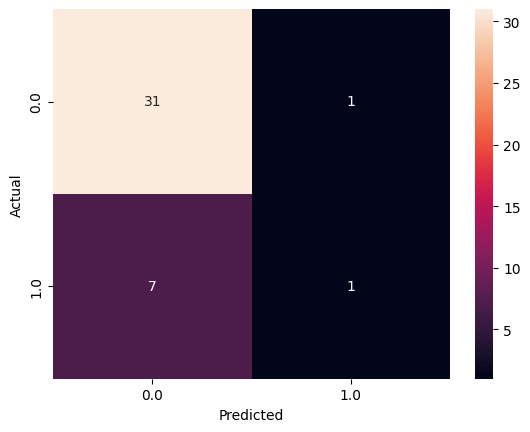

In [ ]:
X = df[['gre', 'gpa', 'rank']]
y = df['admit']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', conf_mat)
acc_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy : ', acc_score)
print('Acc in % : ', int(acc_score*100),'%')

conf_mat = pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)
